In [1]:
!nvidia-smi

Sun Oct 15 08:32:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0     8W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 504A-588F

 Directory of C:\Learn\Climate Change

15-10-2023  08:34    <DIR>          .
27-09-2023  20:58    <DIR>          ..
15-10-2023  08:32    <DIR>          .ipynb_checkpoints
17-09-2023  08:25           459,243 1General-Introduction-.pdf
17-09-2023  08:30           346,885 2023_Call_for_Code_Sustainability_Guide.pdf
17-09-2023  08:27         1,052,030 3Vranceanu-part-1.pdf
17-09-2023  08:32           762,838 4Vranceanu-part-2.pdf
17-09-2023  08:35           651,092 5TrustDefianceCommunity.pdf
08-10-2023  20:30         1,049,193 garbage classification.ipynb
08-10-2023  20:16    <DIR>          garbage_classification_enhanced
17-09-2023  08:25           662,995 Lectures-by-Carbone-4.pdf
15-10-2023  08:34             2,592 Untitled.ipynb
               8 File(s)      4,986,868 bytes
               4 Dir(s)  341,010,984,960 bytes free


In [11]:
path = "garbage_classification_enhanced/"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [13]:
data = pd.DataFrame()
for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['target'] = category
    i = 0
    for photo in os.listdir(path + category):
        temp.loc[i, 'path'] = path + category + "/" + photo
        temp.loc[i, 'filename'] = category + "/" + photo
        temp.loc[i, 'target'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp

In [14]:
data

,path,target,filename
0,garbage_classification_enhanced/battery/batter...,battery,battery/battery1.jpg
1,garbage_classification_enhanced/battery/batter...,battery,battery/battery10.jpg
2,garbage_classification_enhanced/battery/batter...,battery,battery/battery100.jpg
3,garbage_classification_enhanced/battery/batter...,battery,battery/battery101.jpg
4,garbage_classification_enhanced/battery/batter...,battery,battery/battery102.jpg
...,...,...,...
15865,garbage_classification_enhanced/white-glass/wh...,white-glass,white-glass/white-glass94.jpg
15866,garbage_classification_enhanced/white-glass/wh...,white-glass,white-glass/white-glass96.jpg
15867,garbage_classification_enhanced/white-glass/wh...,white-glass,white-glass/white-glass97.jpg
15868,garbage_classification_enhanced/white-glass/wh...,white-glass,white-glass/white-glass98.jpg


garbage_classification_enhanced/clothes/clothes2939.jpg


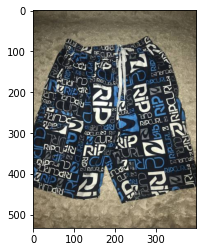

garbage_classification_enhanced/clothes/clothes3810.jpg


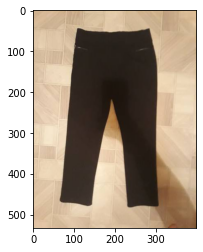

garbage_classification_enhanced/clothes/clothes3036.jpg


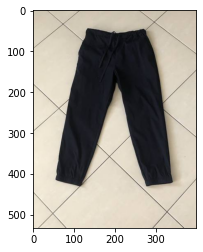

garbage_classification_enhanced/metal/metal320.jpg


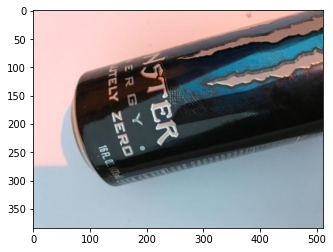

garbage_classification_enhanced/trash/trash225.jpg


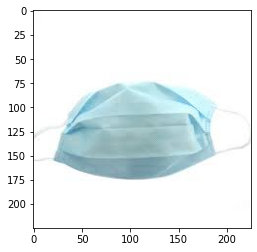

garbage_classification_enhanced/clothes/clothes5111.jpg


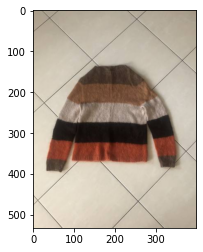

garbage_classification_enhanced/metal/metal595.jpg


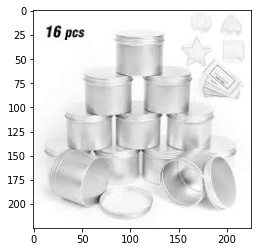

garbage_classification_enhanced/clothes/clothes5118.jpg


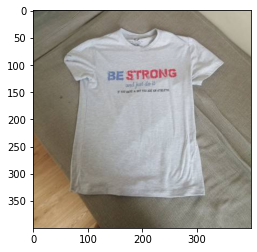

garbage_classification_enhanced/clothes/clothes3372.jpg


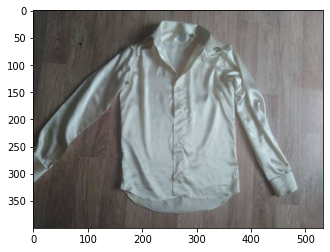

garbage_classification_enhanced/clothes/clothes4345.jpg


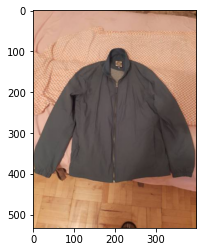

In [15]:
import random
import matplotlib.image as mpimg

for i in range (10):
    random_row = random.randint(0, len(data)-1)
    sample = data.iloc[random_row]
    image = mpimg.imread(sample['path'])
    plt.imshow(image)
    print(sample['path'])
    plt.show()

In [16]:
total_counts = 0

for category in os.listdir(path):
    count_class = 0
    for photo in os.listdir(path + category):
        count_class += 1
        total_counts += 1
    print(str(category) + " has " + str(count_class) + " photos")

battery has 979 photos
biological has 1035 photos
brown-glass has 619 photos
cardboard has 936 photos
clothes has 5286 photos
green-glass has 641 photos
metal has 837 photos
paper has 1108 photos
plastic has 901 photos
shoes has 2006 photos
trash has 726 photos
white-glass has 796 photos


In [22]:
!pip install -U imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.under_sampling import RandomUnderSampler
data_dir = path

In [26]:
# List all image files in the subdirectories and assign labels
image_files = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg'):
                image_files.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

In [27]:
# Visualize the number of classes count
label_counts = pd.DataFrame(labels).value_counts()
label_counts

clothes        5286
shoes          2006
paper          1108
biological     1035
battery         979
cardboard       936
plastic         901
metal           837
white-glass     796
trash           726
green-glass     641
brown-glass     619
dtype: int64

In [28]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

12

In [29]:
# Checking labels shape
labels = np.array(labels)
labels.shape

(15870,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Apply undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(image_files).reshape(-1, 1), labels)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Flatten the resampled data
X_train = X_train.flatten()
X_test = X_test.flatten()

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# Set parameters for data augmentation (optional but recommended)
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [35]:
# Load and augment the training data
train_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_train, 'label': y_train}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),  # VGG16 input size
    batch_size=64,
    class_mode='categorical'
)

Found 5942 validated image filenames belonging to 12 classes.


In [36]:
# Load the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_test, 'label': y_test}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 1486 validated image filenames belonging to 12 classes.


In [37]:
from sklearn.preprocessing import  LabelBinarizer

In [38]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['battery' 'biological' 'brown-glass' 'cardboard' 'clothes' 'green-glass'
 'metal' 'paper' 'plastic' 'shoes' 'trash' 'white-glass']


In [39]:
# Splitting the training data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [41]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 25s 0us/step


In [42]:
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(12, activation='softmax')(x)  # 12 classes

In [43]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [44]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [46]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
93/93 [==============================] - 3731s 40s/step - loss: 1.4674 - accuracy: 0.5523 - val_loss: 1.0196 - val_accuracy: 0.6797
Epoch 2/10
93/93 [==============================] - 2202s 24s/step - loss: 0.9234 - accuracy: 0.7075 - val_loss: 0.8225 - val_accuracy: 0.7248
Epoch 3/10
93/93 [==============================] - 2084s 22s/step - loss: 0.7626 - accuracy: 0.7560 - val_loss: 0.6994 - val_accuracy: 0.7813
Epoch 4/10
93/93 [==============================] - 2841s 31s/step - loss: 0.6663 - accuracy: 0.7886 - val_loss: 0.6761 - val_accuracy: 0.7773
Epoch 5/10
93/93 [==============================] - 2100s 23s/step - loss: 0.6139 - accuracy: 0.8038 - val_loss: 0.6752 - val_accuracy: 0.7853
Epoch 6/10
93/93 [==============================] - 13913s 151s/step - loss: 0.5750 - accuracy: 0.8073 - val_loss: 0.6018 - val_accuracy: 0.7981
Epoch 7/10
93/93 [==============================] - 3540s 38s/step - loss: 0.5288 - accuracy: 0.8251 - val_loss: 0.5880 - val_accuracy: 0.79

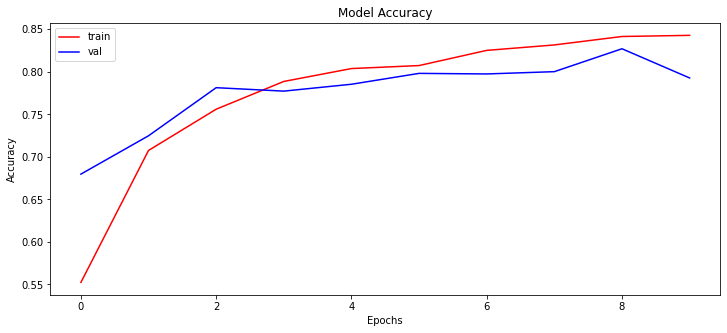

In [48]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

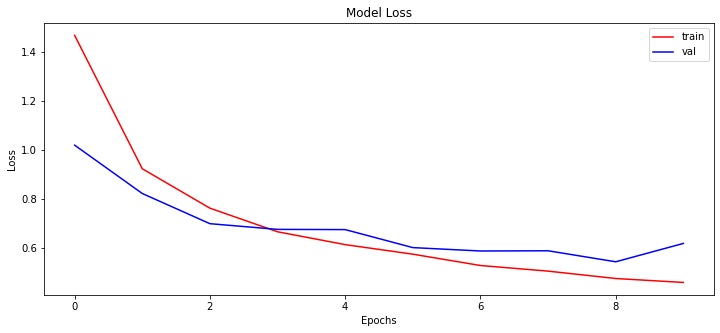

In [49]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [52]:
import pickle

In [53]:
pickle.dump(model, open('model.pkl', 'wb'))

TypeError: can't pickle weakref objects

In [54]:
model.save("ws.h5")

In [55]:
import tensorflow as tf
tf.keras.models.save_model(model, "ws_new.keras")

In [61]:
import numpy as np

In [62]:
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

In [73]:
from tensorflow.keras.preprocessing import image

In [74]:
model1 = load_model("ws_new.keras")

In [58]:
# Prediction plot
def plot_prediction(img_path, prediction):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(prediction)
    plt.show()

In [75]:
image_path = path + "cardboard/cardboard504.jpg"
image_path

'garbage_classification_enhanced/cardboard/cardboard504.jpg'

In [76]:
# Load and preprocess the user-input image
#image_path = path + "metal/metal639.jpg"

img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Make predictions
predictions = model1.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

In [77]:
class_names = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [78]:
predicted_class_name = class_names[predicted_class]

In [79]:
predicted_class_name

'cardboard'